In [1]:
# Import these packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import dicom as pdicom
import os
import scipy.ndimage
import glob
import cv2
import mahotas as mh

Number of images present: 14


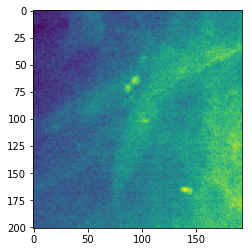

In [27]:
# Load the csv
pth=''
cs1= pd.read_csv(pth+'calc_case_description_test_set.csv',index_col=False)
cs2= pd.read_csv(pth+'calc_case_description_train_set.csv',index_col=False)
labels_df=pd.concat([cs1,cs2])

# There is a trailing line break at the end of each image's path which is removed here
labels_df['ROI mask file path']=pth+'DOI/'+labels_df['ROI mask file path']
imageloc=labels_df['ROI mask file path'].values

# Read & Display images
li=[]
for x in imageloc:
    try:
        img=pdicom.read_file(x,force=True)
        li.append(x)        
        imgpix=img.pixel_array
        plt.imshow(imgpix)
    except:
        pass
print("Number of images present:",len(li))

In [78]:
# Create new CSV with the images stored with it

from skimage.transform import rotate

def preprocess_image(path):
    img=pdicom.read_file(path,force=True)
    imgpix=img.pixel_array

    # Scaling 16-bit pixel to 8-bits
    imgpix=((imgpix/65535)*255).astype(np.uint8)


    # Resizing image to (224,224)
    imgpix=cv2.resize(imgpix,(224,224))

    #Contrast enhancement
    equ = cv2.equalizeHist(imgpix)
    
    #dilation
    k1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 5))
    k4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 7))
    dil= cv2.dilate(equ,k1,iterations = 1)
     #store it back in the dicom image
    img.pixel_array=dil
    return dil

newcsv=pd.DataFrame()
imgcount=0
ROTATE_LEVELS=[0,90,180,270]
for x in range(labels_df.shape[0]):
    row=labels_df.iloc[x]
    imgloc=row['ROI mask file path']
    if imgloc in li:
        img=preprocess_image(imgloc)
        for y in ROTATE_LEVELS:
            if y:
                imgpix=rotate(img,y,preserve_range=True).astype(np.uint8)
            else:
                imgpix=img
            row['pixel_array']=imgpix
            newcsv=newcsv.append(row,ignore_index=True)
newcsv.to_csv('newscv.csv')
print("Done!")
    


/Users/isa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/isa/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:747: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[key] = value


Done!


In [ ]:
# Reading the image
img=pdicom.read_file(li[-5],force=True)
imgpix=img.pixel_array

# Scaling 16-bit pixel to 8-bits
imgpix=((imgpix/65535)*255).astype(np.uint8)

# Resizing image to (224,224)
imgpix=cv2.resize(imgpix,(224,224))

#Contrast enhancement
equ = cv2.equalizeHist(imgpix)

#dilation
k1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (4, 5))
k4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 7))
dil= cv2.dilate(equ,k1,iterations = 1)

# Stacking all the images together for comparison
res = np.hstack((imgpix,equ,dil)) #stacking images side-by-side
plt.imshow(res)

In [ ]:
# Trying out different kernel shapes
k1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 5))
k2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 5))
k3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 5))
k4 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 7))
print(k1,k2,k3,k4,sep="\n")